## Graded Challenge 1

- Name : Fadhil Muhammad Irfan
- Batch : 10

## 1 - Import Libraries

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split Dataset
from sklearn.model_selection import train_test_split

# Capping outliers
from feature_engine.outliers import Winsorizer

# Feature Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

## 2 - Data Loading

In [173]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [174]:
data_copy = data.copy() # Simpan Copy dari File Original

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- Terdapat 5110 data
- Terdapat missing values di kolom "bmi"

In [176]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


- Rata-rata umur di dataset berumur 42.22 dengan median di dataset yaitu 45

## 3 - Exploratory Data Analysis (EDA)

In [177]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [178]:
def hist(x, y):
    plt.figure(figsize=(15, 5))
    sns.histplot(x, bins=30, kde=True)
    plt.title(y)

C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


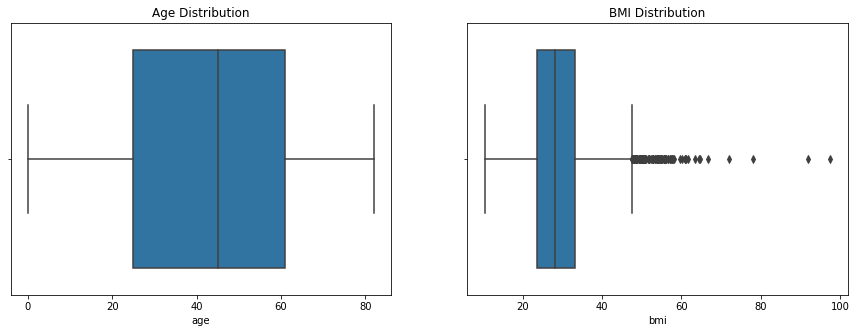

In [179]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data['age'])
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data['bmi'])
plt.title('BMI Distribution')

plt.show()

1.0553402052962912

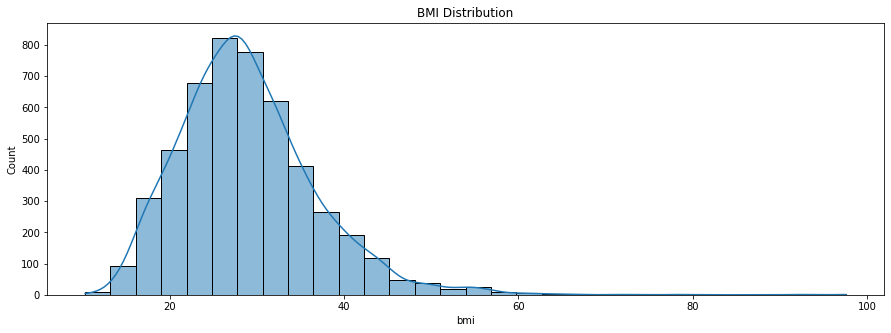

In [180]:
hist(data['bmi'], 'BMI Distribution')
data['bmi'].skew()

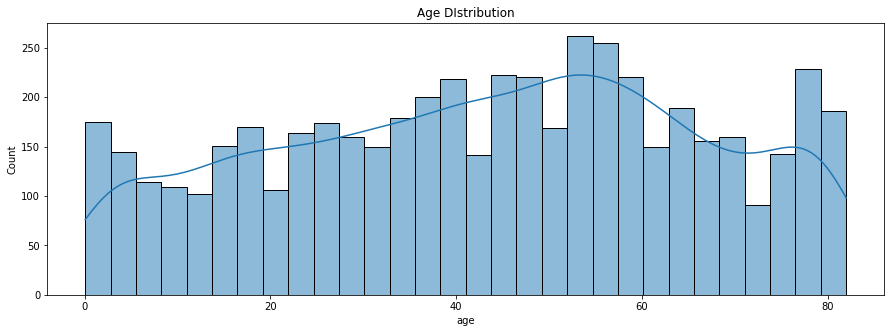

In [181]:
hist(data['age'], 'Age DIstribution')

- Sample yang terancam terkena stroke dimulai dari bayi yang berumur 0 tahun sampai lansia diatas 80 tahun
- Sample paling banyak ada pada umur 45 - 60 tahun
- Terdapat data outlier pada BMI

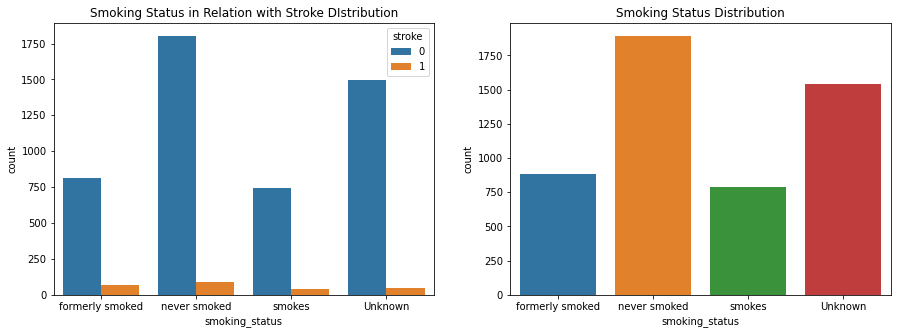

In [182]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='smoking_status', hue='stroke')
plt.title('Smoking Status in Relation with Stroke DIstribution')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='smoking_status')
plt.title('Smoking Status Distribution')

plt.show()

- Data dengan status Never Smoked mempunyai jumlah data paling banyak dan begitupula orang stroke yang tidak pernah merokok juga datanya paling banyak.
- Former smoker dan Smoker jumlah datanya lebih sedikit dibandingkan dengan Never Smoked, akan tetapi jika diperhatikan ratio stroke dan tidak stroke lebih tinggi dibandingkan Never Smoked.

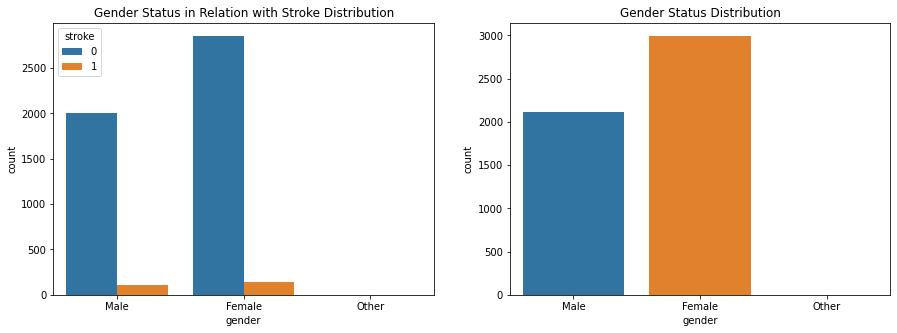

In [183]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='gender', hue='stroke')
plt.title('Gender Status in Relation with Stroke Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='gender')
plt.title('Gender Status Distribution')

plt.show()

In [184]:
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


# 4 - Data Preprocessing

**4.1 Get data inference**

In [185]:
# Get data inference and data train / test

data_inf = data.sample(10, random_state=5)
data_train_test = data.drop(data_inf.index)
data_train_test.reset_index(drop = True, inplace=True)
data_inf.reset_index(drop = True, inplace=True)
data_inf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,56090,Female,65.0,0,0,Yes,Self-employed,Rural,167.31,27.1,never smoked,0
1,46903,Female,62.0,0,0,Yes,Private,Urban,56.74,28.9,never smoked,0
2,49451,Female,53.0,0,0,Yes,Private,Rural,83.91,36.6,Unknown,0
3,71297,Female,80.0,1,0,Yes,Private,Urban,125.89,28.9,smokes,0
4,57598,Female,64.0,0,0,Yes,Private,Rural,78.45,27.0,formerly smoked,0
5,8145,Male,30.0,0,0,No,Private,Urban,86.21,28.8,smokes,0
6,63577,Female,50.0,1,0,Yes,Self-employed,Rural,68.80,34.9,never smoked,0
7,45983,Male,21.0,0,0,No,Private,Urban,56.79,20.4,Unknown,0
8,37031,Female,78.0,0,1,Yes,Govt_job,Urban,70.21,24.8,never smoked,0
9,28258,Female,80.0,0,0,Yes,Self-employed,Urban,75.06,29.7,Unknown,0


**4.2 Split dataset**

In [186]:
# Split between train-set and test-set

X = data_train_test.drop('stroke', axis =1)
y = data_train_test['stroke']
X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5095,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5096,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5097,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5098,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (4080, 11)
Test Size :  (1020, 11)


In [188]:
X_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1682,36722,Female,30.0,0,0,Yes,Private,Urban,123.65,44.0,smokes
64,7356,Male,75.0,0,0,Yes,Private,Urban,104.72,NaN,Unknown
3853,57924,Female,45.0,0,0,Yes,Govt_job,Rural,63.01,31.5,never smoked
1864,66110,Female,55.0,0,0,Yes,Private,Rural,63.47,27.8,Unknown
982,2751,Male,50.0,0,0,Yes,Govt_job,Urban,110.73,28.7,smokes
...,...,...,...,...,...,...,...,...,...,...,...
3046,41618,Male,61.0,0,0,No,Private,Rural,140.07,29.5,never smoked
1725,42082,Male,13.0,0,0,No,children,Rural,99.71,23.5,Unknown
4079,2109,Female,8.0,0,0,No,children,Urban,125.14,29.7,Unknown
2254,5863,Female,71.0,0,0,Yes,Private,Urban,240.81,27.4,never smoked


**4.3 Handling Missing Values**

In [189]:
# Input mean values to missing values 

X_train['bmi'].fillna(X_train['bmi'].mean(), inplace=True)
X_test['bmi'].fillna(X_train['bmi'].mean(), inplace=True) # X test input dari Train Value

C:\Users\OWNER\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [190]:
X_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1682,36722,Female,30.0,0,0,Yes,Private,Urban,123.65,44.000000,smokes
64,7356,Male,75.0,0,0,Yes,Private,Urban,104.72,28.940081,Unknown
3853,57924,Female,45.0,0,0,Yes,Govt_job,Rural,63.01,31.500000,never smoked
1864,66110,Female,55.0,0,0,Yes,Private,Rural,63.47,27.800000,Unknown
982,2751,Male,50.0,0,0,Yes,Govt_job,Urban,110.73,28.700000,smokes
...,...,...,...,...,...,...,...,...,...,...,...
3046,41618,Male,61.0,0,0,No,Private,Rural,140.07,29.500000,never smoked
1725,42082,Male,13.0,0,0,No,children,Rural,99.71,23.500000,Unknown
4079,2109,Female,8.0,0,0,No,children,Urban,125.14,29.700000,Unknown
2254,5863,Female,71.0,0,0,Yes,Private,Urban,240.81,27.400000,never smoked


**4.4 Handling Outliers**

In [191]:
# Use capping method for handling outliers

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['bmi'])

windsoriser.fit(X_train)

X_train_mvo = windsoriser.transform(X_train)
X_test_mvo = windsoriser.transform(X_test)

**4.5 Normalisation for Numerical and Categorical Column**

In [192]:
num_columns = X_train_mvo.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_mvo.select_dtypes(include=['object']).columns.tolist()

print('Numerical col: ', num_columns)
print('Categorical col: ', cat_columns)

Numerical col:  ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
Categorical col:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [193]:
X_train_num = X_train_mvo[num_columns]
X_train_cat = X_train_mvo[cat_columns]

X_test_num = X_test_mvo[num_columns]
X_test_cat = X_test_mvo[cat_columns]

In [200]:
X_test_cat

,gender,ever_married,work_type,Residence_type,smoking_status
2098,Female,No,Private,Rural,Unknown
4973,Male,Yes,Private,Rural,never smoked
1534,Female,Yes,Private,Urban,smokes
3014,Female,Yes,Private,Rural,Unknown
2217,Male,Yes,Private,Rural,never smoked
...,...,...,...,...,...
1597,Male,No,children,Urban,Unknown
3510,Male,Yes,Private,Rural,Unknown
1965,Male,Yes,Private,Urban,smokes
4972,Male,No,Private,Rural,never smoked


In [194]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.50315027, 0.36523438, 0.        , 0.        , 0.31636045,
        0.93428571],
       [0.10005353, 0.91455078, 0.        , 0.        , 0.22897239,
        0.50400233],
       [0.79418265, 0.54833984, 0.        , 0.        , 0.03642323,
        0.57714286],
       ...,
       [0.02802981, 0.09667969, 0.        , 0.        , 0.32323885,
        0.52571429],
       [0.07955965, 0.86572266, 0.        , 0.        , 0.8572154 ,
        0.46      ],
       [0.89780511, 0.27978516, 0.        , 0.        , 0.03157603,
        0.30571429]])

In [203]:
# Feature Encoding using Ordinal Encoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() 

for i in X_train_cat:
    if X_train_cat[i].dtypes == 'object':
        X_train_cat[i] = encoder.fit_transform(X_train_cat[i])
        X_test_cat[i] = encoder.transform(X_test_cat[i])

C:\Users\OWNER\AppData\Local\Temp/ipykernel_11276/4046295527.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat[i] = encoder.fit_transform(X_train_cat[i])
C:\Users\OWNER\AppData\Local\Temp/ipykernel_11276/4046295527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat[i] = encoder.transform(X_test_cat[i])


In [234]:

X_train_cat['gender'] = encoder.fit_transform(X_train_cat['gender'])


C:\Users\OWNER\AppData\Local\Temp/ipykernel_11276/3522241151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat['gender'] = encoder.fit_transform(X_train_cat['gender'])


In [246]:
# Concat Numerical and Categorical Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis =1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis =1)
X_train_final.shape

(4080, 11)

**4.6 Feature Selection**

In [247]:
X_train_final = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_test_final = pd.DataFrame(X_test_final, columns=[num_columns + cat_columns])
X_train_final

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,0.503150,0.365234,0.0,0.0,0.316360,0.934286,0.0,1.0,2.0,1.0,3.0
1,0.100054,0.914551,0.0,0.0,0.228972,0.504002,1.0,1.0,2.0,1.0,0.0
2,0.794183,0.548340,0.0,0.0,0.036423,0.577143,0.0,1.0,0.0,0.0,2.0
3,0.906549,0.670410,0.0,0.0,0.038547,0.471429,0.0,1.0,2.0,0.0,0.0
4,0.036842,0.609375,0.0,0.0,0.256717,0.497143,1.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
4075,0.570356,0.743652,0.0,0.0,0.392161,0.520000,1.0,0.0,2.0,0.0,2.0
4076,0.576725,0.157715,0.0,0.0,0.205844,0.348571,1.0,0.0,4.0,0.0,0.0
4077,0.028030,0.096680,0.0,0.0,0.323239,0.525714,0.0,0.0,4.0,1.0,0.0
4078,0.079560,0.865723,0.0,0.0,0.857215,0.460000,0.0,1.0,2.0,1.0,2.0


In [248]:
X_train_final.drop('id', axis=1, inplace=True)
X_test_final.drop('id', axis=1, inplace=True)

C:\Users\OWNER\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [249]:
X_train_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,0.365234,0.0,0.0,0.316360,0.934286,0.0,1.0,2.0,1.0,3.0
1,0.914551,0.0,0.0,0.228972,0.504002,1.0,1.0,2.0,1.0,0.0
2,0.548340,0.0,0.0,0.036423,0.577143,0.0,1.0,0.0,0.0,2.0
3,0.670410,0.0,0.0,0.038547,0.471429,0.0,1.0,2.0,0.0,0.0
4,0.609375,0.0,0.0,0.256717,0.497143,1.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
4075,0.743652,0.0,0.0,0.392161,0.520000,1.0,0.0,2.0,0.0,2.0
4076,0.157715,0.0,0.0,0.205844,0.348571,1.0,0.0,4.0,0.0,0.0
4077,0.096680,0.0,0.0,0.323239,0.525714,0.0,0.0,4.0,1.0,0.0
4078,0.865723,0.0,0.0,0.857215,0.460000,0.0,1.0,2.0,1.0,2.0


## 5 - Model Definition and Model Training

In [250]:
# Training using Linear Regression
from sklearn.linear_model import LogisticRegression

model_log_reg = LogisticRegression()

model_log_reg.fit(X_train_final, y_train)

LogisticRegression()

## 6 - Model Evaluation

In [251]:
y_pred_train = model_log_reg.predict(X_train_final)
y_pred_test = model_log_reg.predict(X_test_final)

In [252]:
from sklearn.metrics import mean_absolute_error

print('Error - Train : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test : ', mean_absolute_error(y_test, y_pred_test))

Error - Train :  0.04852941176470588
Error - Test :  0.05


In [254]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       969
           1       0.00      0.00      0.00        51

    accuracy                           0.95      1020
   macro avg       0.47      0.50      0.49      1020
weighted avg       0.90      0.95      0.93      1020



C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [255]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3882
           1       0.00      0.00      0.00       198

    accuracy                           0.95      4080
   macro avg       0.48      0.50      0.49      4080
weighted avg       0.91      0.95      0.93      4080



C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 7 - Model Inference

In [256]:
data_inf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,56090,Female,65.0,0,0,Yes,Self-employed,Rural,167.31,27.1,never smoked,0
1,46903,Female,62.0,0,0,Yes,Private,Urban,56.74,28.9,never smoked,0
2,49451,Female,53.0,0,0,Yes,Private,Rural,83.91,36.6,Unknown,0
3,71297,Female,80.0,1,0,Yes,Private,Urban,125.89,28.9,smokes,0
4,57598,Female,64.0,0,0,Yes,Private,Rural,78.45,27.0,formerly smoked,0
5,8145,Male,30.0,0,0,No,Private,Urban,86.21,28.8,smokes,0
6,63577,Female,50.0,1,0,Yes,Self-employed,Rural,68.80,34.9,never smoked,0
7,45983,Male,21.0,0,0,No,Private,Urban,56.79,20.4,Unknown,0
8,37031,Female,78.0,0,1,Yes,Govt_job,Urban,70.21,24.8,never smoked,0
9,28258,Female,80.0,0,0,Yes,Self-employed,Urban,75.06,29.7,Unknown,0


In [257]:
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [259]:
data_inf_num_scaled = scaler.transform(data_inf_num)

In [261]:
for i in X_train_cat:
    if data_inf_cat[i].dtypes == 'object':
        data_inf_cat[i] = encoder.fit_transform(data_inf_cat[i])

C:\Users\OWNER\AppData\Local\Temp/ipykernel_11276/1891302063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inf_cat[i] = encoder.fit_transform(data_inf_cat[i])


In [264]:
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat], axis =1)

In [267]:
data_inf_final = pd.DataFrame(data_inf_final, columns= [num_columns + cat_columns])
data_inf_final

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,0.769008,0.792480,0.0,0.0,0.517912,0.451429,0.0,1.0,2.0,0.0,2.0
1,0.642901,0.755859,0.0,0.0,0.007479,0.502857,0.0,1.0,1.0,1.0,2.0
2,0.677877,0.645996,0.0,0.0,0.132906,0.722857,0.0,1.0,1.0,0.0,0.0
3,0.977749,0.975586,1.0,0.0,0.326701,0.502857,0.0,1.0,1.0,1.0,3.0
4,0.789708,0.780273,0.0,0.0,0.107700,0.448571,0.0,1.0,1.0,0.0,1.0
5,0.110884,0.365234,0.0,0.0,0.143523,0.500000,1.0,0.0,1.0,1.0,3.0
6,0.871779,0.609375,1.0,0.0,0.063152,0.674286,0.0,1.0,2.0,0.0,2.0
7,0.630273,0.255371,0.0,0.0,0.007709,0.260000,1.0,0.0,1.0,1.0,0.0
8,0.507392,0.951172,0.0,1.0,0.069661,0.385714,0.0,1.0,0.0,1.0,2.0
9,0.386968,0.975586,0.0,0.0,0.092051,0.525714,0.0,1.0,2.0,1.0,0.0


In [272]:
data_inf_final.drop('id', axis=1, inplace = True)

C:\Users\OWNER\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [276]:
y_pred_inf = model_log_reg.predict(data_inf_final)

In [277]:
y_pred_inf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Dari semua data Inference TIDAK ADA YANG STROKE

In [278]:
data_inf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,56090,Female,65.0,0,0,Yes,Self-employed,Rural,167.31,27.1,never smoked,0
1,46903,Female,62.0,0,0,Yes,Private,Urban,56.74,28.9,never smoked,0
2,49451,Female,53.0,0,0,Yes,Private,Rural,83.91,36.6,Unknown,0
3,71297,Female,80.0,1,0,Yes,Private,Urban,125.89,28.9,smokes,0
4,57598,Female,64.0,0,0,Yes,Private,Rural,78.45,27.0,formerly smoked,0
5,8145,Male,30.0,0,0,No,Private,Urban,86.21,28.8,smokes,0
6,63577,Female,50.0,1,0,Yes,Self-employed,Rural,68.80,34.9,never smoked,0
7,45983,Male,21.0,0,0,No,Private,Urban,56.79,20.4,Unknown,0
8,37031,Female,78.0,0,1,Yes,Govt_job,Urban,70.21,24.8,never smoked,0
9,28258,Female,80.0,0,0,Yes,Self-employed,Urban,75.06,29.7,Unknown,0


In [279]:
data_inf['stroke pred'] = y_pred_inf

In [280]:
data_inf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke pred
0,56090,Female,65.0,0,0,Yes,Self-employed,Rural,167.31,27.1,never smoked,0,0
1,46903,Female,62.0,0,0,Yes,Private,Urban,56.74,28.9,never smoked,0,0
2,49451,Female,53.0,0,0,Yes,Private,Rural,83.91,36.6,Unknown,0,0
3,71297,Female,80.0,1,0,Yes,Private,Urban,125.89,28.9,smokes,0,0
4,57598,Female,64.0,0,0,Yes,Private,Rural,78.45,27.0,formerly smoked,0,0
5,8145,Male,30.0,0,0,No,Private,Urban,86.21,28.8,smokes,0,0
6,63577,Female,50.0,1,0,Yes,Self-employed,Rural,68.80,34.9,never smoked,0,0
7,45983,Male,21.0,0,0,No,Private,Urban,56.79,20.4,Unknown,0,0
8,37031,Female,78.0,0,1,Yes,Govt_job,Urban,70.21,24.8,never smoked,0,0
9,28258,Female,80.0,0,0,Yes,Self-employed,Urban,75.06,29.7,Unknown,0,0


## Conclusion